# Chapter 04 - Classification

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.formula.api as smf

colors = plt.cycler(color=["#557A95",   "#957055", "#559570"]) 
sns.set_context('paper', font_scale=1.4)
plt.rcParams['figure.figsize'] = [9,6]
plt.rcParams['savefig.dpi'] = 300
plt.rc("legend", frameon=False)
plt.rc("axes.spines", top=False, right=False)
plt.rcParams['axes.prop_cycle'] = colors
mycolors = colors.by_key()["color"]

## Confirmation of probabilities

In [10]:
def logistic(z):
    return 1/(1 + np.exp(-z))

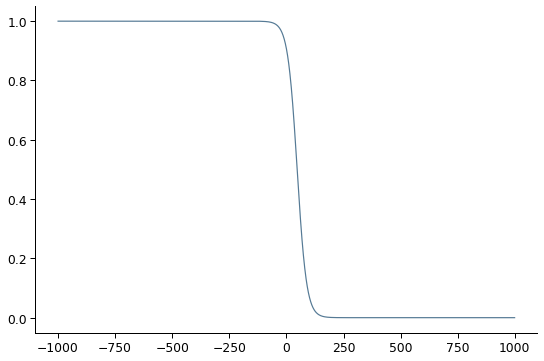

In [11]:
ages = np.arange(-1000,1000) 
z = 2.2662 - 0.0484 * ages
plt.plot(ages, logistic(z))

## Churn data

In [12]:
link = "https://raw.githubusercontent.com/fredzett/Notebooks/master/Churn.csv"
df = pd.read_csv(link)